# An example of how to test our IForestASD Implementation & Compare the two versions of IForestASD regarding the drift detection (IForestASD ADWIN VS IForestASD AnomalyRate)

L'objectif est de voir comment ADWIN IForestASD se positionne par rapport à IForestASD suivant différents jeux de données simulés.

Vu le caractère aléatoire des deux méthodes, pour chaque jeu de données, on fait un certain nombre d'exécution avec les mêmes paramètres et la moyenne des résultats est donc consignée avec la variance.

## Install skmultiflow if needed
You need to install git

In [1]:
#print("scikit-multiflow package installation")
#!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [2]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [3]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime
#from skmultiflow.data import AnomalySineGenerator

## General parameters for the evaluation

In [4]:
#************************ Execution settings *******************************
#window_sizes = [50, 100, 500, 1000]
#n_estimators = [30, 50, 100]
window = 100 # Number of sample in one window, window size.
n_estimator = 30 # Number of itree in the random forest
execution_number = 1 # Number of execution because of the random character of IForest
anomaly_threshold = 0.5 # Anomaly threshold to decide which is anomaly or not
max_sample = 400 # Total size of data to examine (windows number = max_sample/window)
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size']

#************************ Stream data settings *******************************
window_number = round((max_sample/window),0) # The number of window to save on .csv file
#Parameters to partially update the model
n_estimators_updated=0.5
updated_randomly=True

## Execution Function

In [5]:
def execute_comparision():
    print("")
    print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
    func.run_IForestASD_comparison(execution_number=execution_number, stream=stream, stream_n_features=stream.n_features, window = window, 
                     estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                     result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics,
                     n_estimators_updated=n_estimators_updated, updated_randomly=updated_randomly)

## Applied On Simple Stream Dataset
### Idea and waitting results
The idea of using a simple stream data whitout anomalies or drift is to test both methods on a neutral environnement.
Normally, SADWIN IForestASD or PADWIN IForestASD method will not update his model (It will be a good result) and it will have better or similar performances like Original IForestASD. The model_size and the total time can be upper than Orignal IForestASD ones because it take time to use ADWIN.
### Results
#### Model updating
- Original IForest ASD always update its model in every window because we give it the exact percentage of noise in every stream
- SADWIN update its model for the last-1 window
- PADWIN never update its model (This is the real waittng behavior)
#### Method performances
PADWIN take too long time and memory to compute without any better performance than Original IForestASD
It was too long than SADWIN because it had to compute scores and prediction but SADWIN only had to compute scores.
PADWIN and SADWIN were long and memory consumption than Original IForest ASD because they had to compute ADWIN for every instance (score/prediction). And ADWIN also take a time to compute.

### Summary
For this kind of stream which do not contains any real anomaly or any drift, Original IForest is better but only when the user give him the appropriate and real anomaly rate to work.
In the real world, every thing is unsupervised. In unserpervised way, user can not really know the perfect anomaly rate in the stream so IForest ASD way to detect drift have to change.
Here we can not really conclude between Original IForest ASD and ADWIN IForest ASD but SADWIN IForest ASD seems to be better than PADWIN IForest ASD.


******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


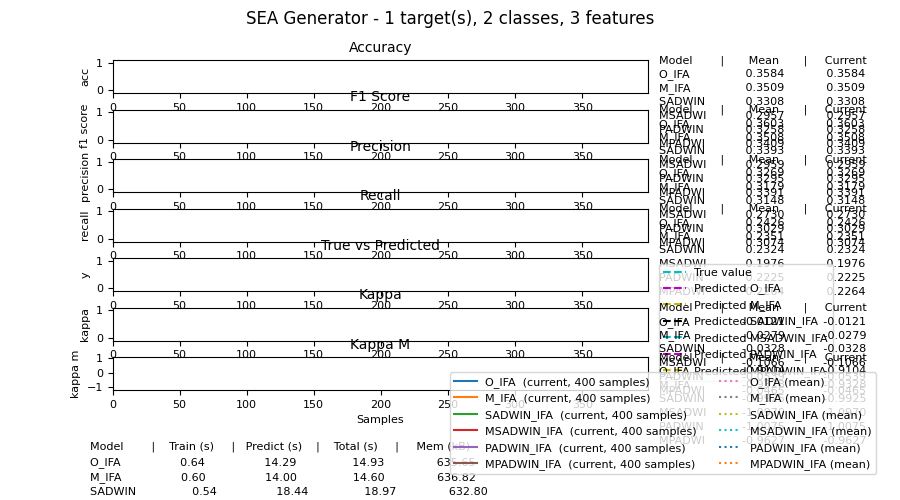

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [28.90s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ###############----- [75%] [74.83s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #################### [100%] [131.59s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.3584
O_IFA - Kappa        : -0.0121
O_IFA - Kappa M      : -0.9104
O_IFA - Precision: 0.3269
O_IFA - Recall: 0.2426
O_IFA - F1 score: 0.3603
O_IFA - Training time (s)  : 0.64
O_IFA - Testing time  (s)  : 14.29
O_IFA - Total time    (s)  : 14.93
O_IFA - Size (kB)          : 635.6523
M_IFA - Accuracy     : 0.3509
M_IFA - Kappa        : -0.0279
M_IFA - Kappa M      : -0.9328
M_IFA - Precision: 0.31

<IPython.core.display.Javascript object>


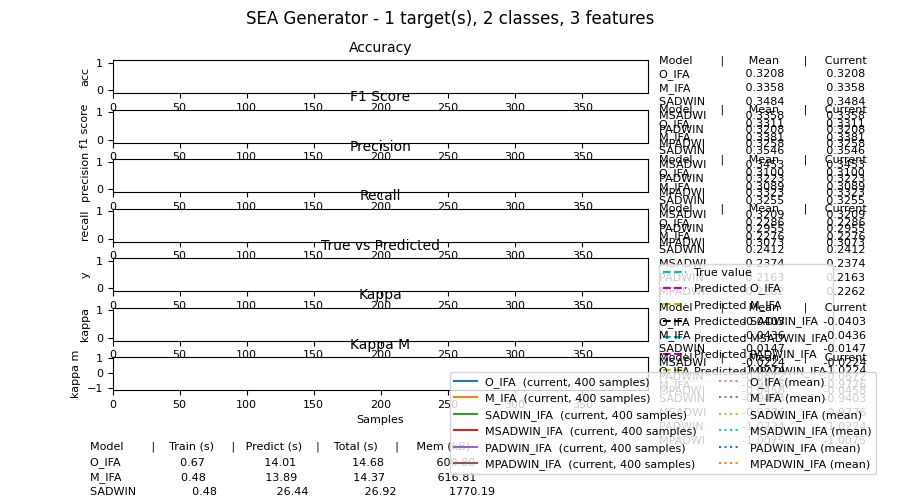

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [28.96s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ###############----- [75%] [76.92s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was partially updated by training a sub new iForest with the version : SMADWIN
 #################### [100%] [129.11s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.3208
O_IFA - Kappa        : -0.0403
O_IFA - Kappa M      : -1.0224
O_IFA - Precision: 0.3100
O_IFA - Recall: 0.2286
O_IFA - F1 score: 0.3311
O_IFA - Training time (s)  : 0.67
O_IFA - Testing time  (s)  : 14.01
O_IFA - Total time    (s)  : 14.68
O_IFA - Size (kB)          : 600.8008
M_IFA - Accuracy     : 0.3358
M_IFA - Kappa        : -0.0436
M_IFA - Kappa M      : -0.9776
M_IFA - 

In [6]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.1, random_state=1)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Stream data containning anomalies
### Idea and waitting results
The idea of using a stream data with anomalies and without drift is to test both methods on a anomaly environnement.
Normally, SADWIN IForestASD or PADWIN IForestASD method will not update his model (It will be a good result) and it will have better or similar performances like Original IForestASD. The model_size and the total time can be upper than Orignal IForestASD ones because it take time to use ADWIN.
### Results
#### Model updating
- Original IForest ASD always update its model in every window because we give it the exact percentage of noise in every stream
- SADWIN update its model for the last-1 window
- PADWIN never update its model (This is the real waittng behavior)
#### Method performances

### Summary

1000

******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


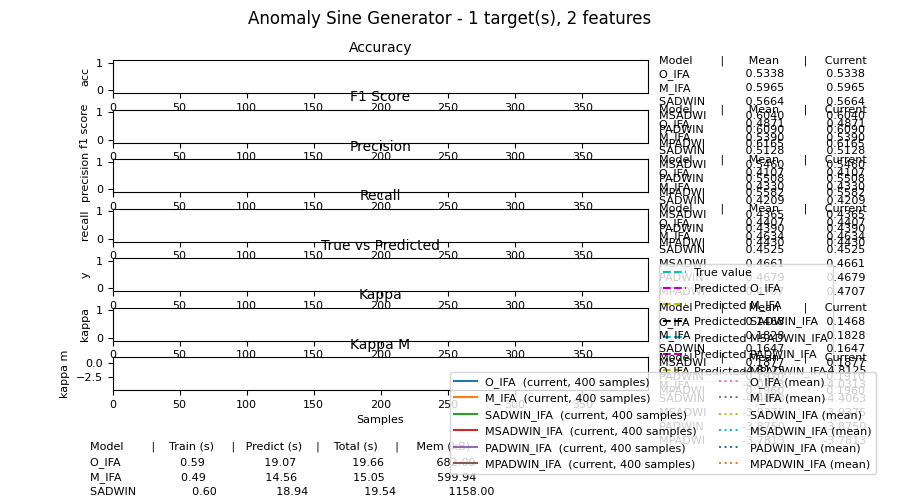

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [30.54s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was partially updated by training a sub new iForest with the version : SMADWIN
 ###############----- [75%] [74.54s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [131.12s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.5338
O_IFA - Kappa        : 0.1468
O_IFA - Kappa M      : -4.8125
O_IFA - Precision: 0.4107
O_IFA - Recall: 0.4407
O_IFA - F1 score: 0.4871
O_IFA - Training time (s)  : 0.59
O_IFA - Testing time  (s)  : 19.07
O_IFA - Total time    (s)  : 19.66
O_IFA - Size (kB)          : 681.9961
M_IFA - Accuracy     : 0.5965
M_IFA - Kappa        : 0.1828
M_IFA - Kappa M      : -4.0313
M_IFA - Precisi

<IPython.core.display.Javascript object>


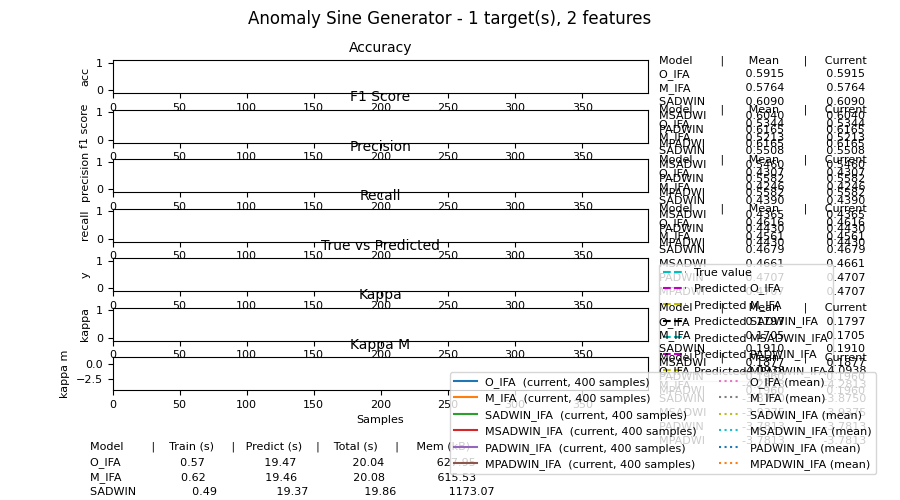

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [31.55s]
The model was updated by training a new iForest with the version : SADWIN

The model was partially updated by training a sub new iForest with the version : SMADWIN
 ###############----- [75%] [80.60s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [138.98s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.5915
O_IFA - Kappa        : 0.1797
O_IFA - Kappa M      : -4.0938
O_IFA - Precision: 0.4307
O_IFA - Recall: 0.4616
O_IFA - F1 score: 0.5344
O_IFA - Training time (s)  : 0.57
O_IFA - Testing time  (s)  : 19.47
O_IFA - Total time    (s)  : 20.04
O_IFA - Size (kB)          : 627.9531
M_IFA - Accuracy     : 0.5764
M_IFA - Kappa        : 0.1705
M_IFA - Kappa M      : -4.2813
M_IFA - Precision: 0.4246
M_IFA - Recall: 0.4561
M_IFA - F1 score: 0.5213
M_IFA - Training time (s)  : 0.62
M_

In [7]:
dataset_name = "AnomalySineGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
n_samples=10000
anomalies_percentage = 0.1
n_anomalies= int(n_samples*anomalies_percentage)
print(str(n_anomalies))
stream = func.get_anomalies_data_generated(n_samples=n_samples, n_anomalies=n_anomalies, contextual=False,
                 n_contextual=0.0, shift=4, noise=0.1, replace=True, random_state=None)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Simple ConceptDrift Stream Dataset

### When drift start one window and is in the window


******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


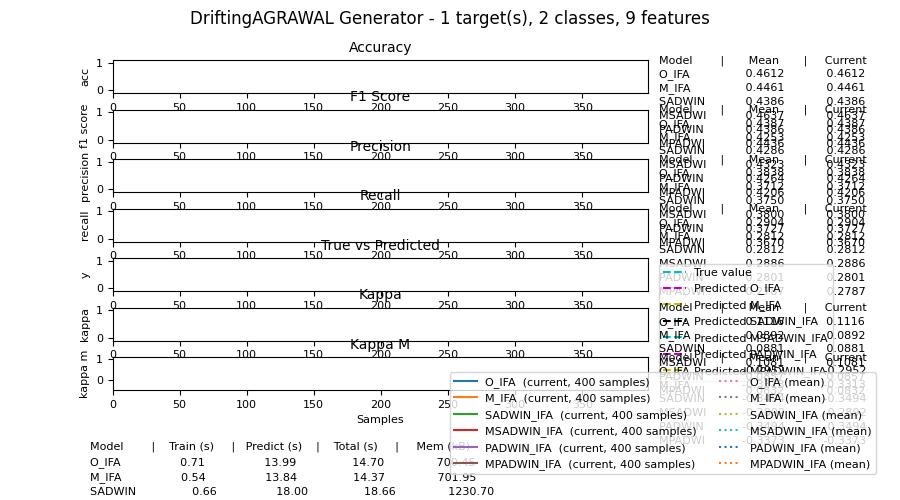

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [28.93s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was partially updated by training a sub new iForest with the version : SMADWIN
 ###############----- [75%] [66.47s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [120.96s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.4612
O_IFA - Kappa        : 0.1116
O_IFA - Kappa M      : -0.2952
O_IFA - Precision: 0.3838
O_IFA - Recall: 0.2904
O_IFA - F1 score: 0.4387
O_IFA - Training time (s)  : 0.71
O_IFA - Testing time  (s)  : 13.99
O_IFA - Total time    (s)  : 14.70
O_IFA - Size (kB)          : 700.4453
M_IFA - Accuracy     : 0.4

<IPython.core.display.Javascript object>


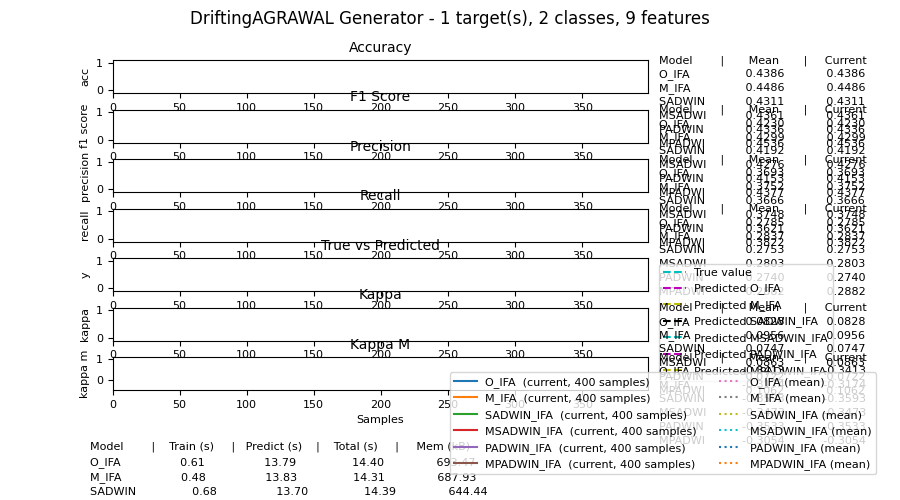

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [28.76s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 ###############----- [75%] [70.31s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #################### [100%] [122.25s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.4386
O_IFA - Kappa        : 0.0828
O_IFA - Kappa M      : -0.3413
O_IFA - Precision: 0.3693
O_IFA - Recall: 0.2785
O_IFA - F1 score: 0.4230
O_IFA - Training time (s)  : 0.61
O_IFA - Testing time  (s)  : 13.79
O_IFA - Total time    (s)  : 14.40
O_IFA - Size (kB)          : 693.4727
M_IFA - Accuracy     : 0.4486
M_IFA - Kap

In [8]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 5, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 100, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift is in one window and don't start the window


******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


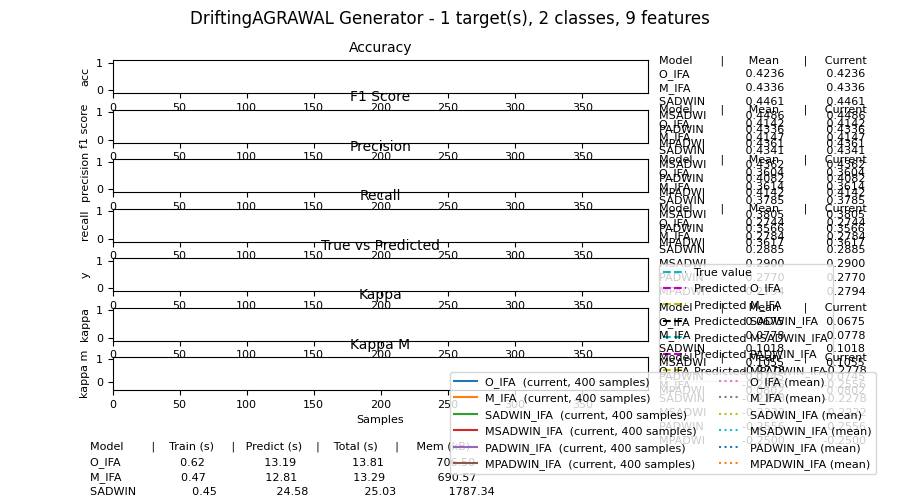

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [27.37s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was partially updated by training a sub new iForest with the version : SMADWIN
 ###############----- [75%] [65.80s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [119.03s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.4236
O_IFA - Kappa        : 0.0675
O_IFA - Kappa M      : -0.2778
O_IFA - Precision: 0.3604
O_IFA - Recall: 0.2744
O_IFA - F1 score: 0.4142
O_IFA - Training time (s)  : 0.62
O_IFA - Testing time  (s)  : 13.19
O_IFA - Total time    (s)  : 13.81
O_IFA - Size (kB)          : 706.5039
M_IFA - Accuracy     : 0.4336
M_IFA - Kappa        : 0.0778
M_IFA - Kappa M      : -0.2556
M_IFA - Pr

<IPython.core.display.Javascript object>


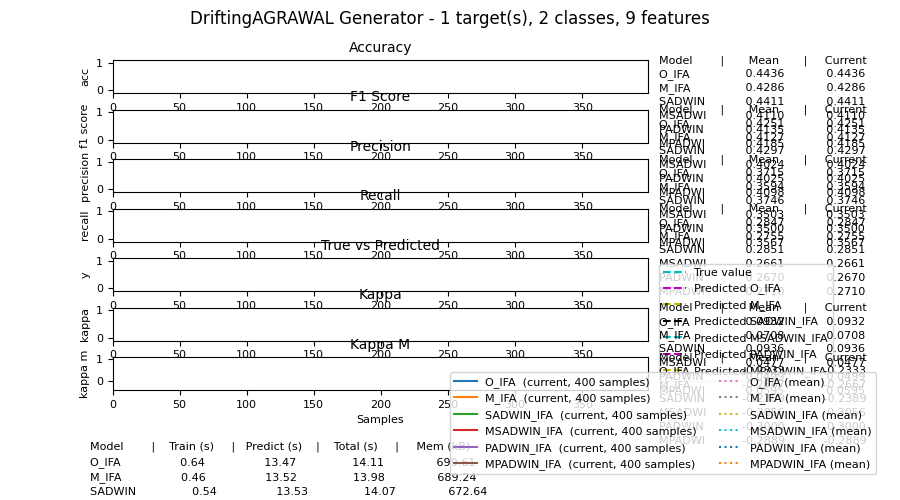

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [26.99s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was partially updated by training a sub new iForest with the version : SMADWIN
 ###############----- [75%] [64.13s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #################### [100%] [113.54s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.4436
O_IFA - Kappa        : 0.0932
O_IFA - Kappa M      : -0.2333
O_IFA - Precision: 0.3715
O_IFA - Recall: 0.2847
O_IFA - F1 score: 0.4251
O_IFA - Training time (s)  : 0.64
O_IFA - Testing time  (s)  : 13.47
O_IFA - Total time    (s

In [9]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 110, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift don't start a window but is between two windows


******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


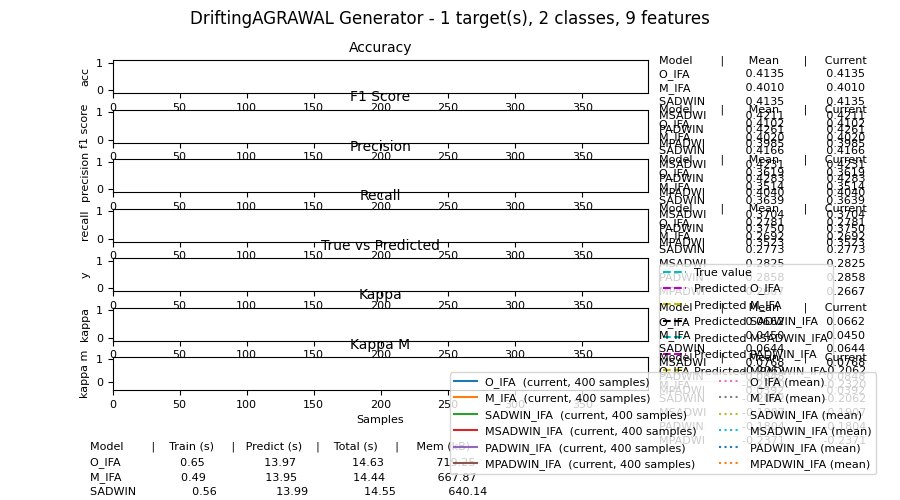

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [28.84s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 ###############----- [75%] [71.22s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was partially updated by training a sub new iForest with the version : SMADWIN
 #################### [100%] [116.90s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.4135
O_IFA - Kappa        : 0.0662
O_IFA - Kappa M      : -0.2062
O_IFA - Precision: 0.3619
O_IFA - Recall: 0.2781
O_IFA - F1 score: 0.4102
O_IFA - Training time (s)  : 0.65
O_IFA - Testing time  (s)  : 13.97
O_IFA - Total time    (s

<IPython.core.display.Javascript object>


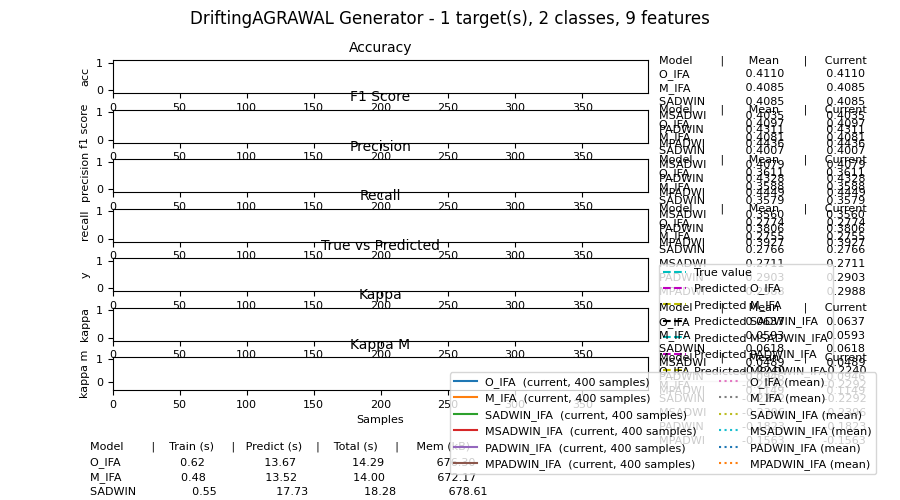

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [28.23s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ###############----- [75%] [73.63s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was partially updated by training a sub new iForest with the version : MAnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #################### [100%] [126.27s]
Processed samples: 400
Mean performance:
O_IFA - Accuracy     : 0.4110
O_IFA - Kappa        : 0.0637
O_IFA - Kappa M      : -0.2240
O_IFA - Precision: 0.3611
O_IFA - Recall: 0.2774
O_IFA - F1 score: 0.4097
O_IFA - Training time (s)  : 0.62
O_IFA - Testing time  (s)  : 13.67
O_IFA - Total time    (s)  : 14.29
O_IFA - Size (kB)          : 676.3047
M_IFA - Accuracy     : 0.4085
M_IFA - Kappa        : 0.0593
M_IFA - Kappa M      : -0.2292
M_IFA - Precision: 0.3588

In [10]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 175, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()